# Xarray-spatial
### User Guide: Zonal crosstab
-----

Xarray-spatial's zonal crosstab function provides an easy way to calculate cross-tabulated (categorical stats) areas between two datasets that can help in identifying patterns and trends in the data. In this notebook, we'll analyze temperature by elevation. We use temperature data from [MODIS](https://planetarycomputer.microsoft.com/dataset/modis-21A2-061) dataset. The elevation data is from [NASADEM](https://planetarycomputer.microsoft.com/dataset/nasadem) dataset. Both the 2 are coutinuous data. To categorize them, we'll group elevation into different classes so that elevation of similar height will be in the same class. Similarly, temperature will also be classified into different classes. We'll use zonal crosstab in 2 different scenarios:


[2D Zonal Crosstab](#2D-Zonal-Crosstab) to see how temperature is changed by elevation.  
[3D Zonal Crosstab](#3D-Zonal-Crosstab) to see how temperature is changed over time.

-----------


## Load data

The region of interest is a small area around the [Death Valley National Park
](https://www.google.com/maps/place/Death+Valley+National+Park/@36.5052209,-119.093306,538106m/data=!3m1!1e3!4m5!3m4!1s0x80c74b7776ae8a47:0xccc9f07c7bf2b054!8m2!3d36.5053891!4d-117.0794078!5m1!1e4), Skidoo, California, USA with an extent of `[-118, 36, -117, 37]` (EPSG:4326).

All data in this notebook has been loaded from stac items and has been coregistered so that they are well aligned. 

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

from datashader.transfer_functions import shade, stack, Images

from xrspatial import hillshade
from xrspatial.classify import quantile
from xrspatial import zonal_crosstab

#### Load elevation data

In [2]:
elevation = xr.open_rasterio('elevation.tif').sel(band=1)
elevation

/tmp/ipykernel_568/1080631585.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  elevation = xr.open_rasterio('elevation.tif').sel(band=1)


<xarray.DataArray (y: 1386, x: 1114)>
[1544004 values with dtype=float64]
Coordinates:
    band     int64 1
  * y        (y) float64 4.439e+06 4.439e+06 4.439e+06 ... 4.301e+06 4.301e+06
  * x        (x) float64 -1.314e+07 -1.314e+07 ... -1.302e+07 -1.302e+07
Attributes:
    transform:      (100.0199999999998, 0.0, -13135776.629999999, 0.0, -100.0...
    crs:            +init=epsg:3857
    res:            (100.0199999999998, 100.0200000000008)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('stackstac-a7a0e52c1330cef2ddbd1fb65b6d3192',)
    AREA_OR_POINT:  Area
    resolution:     100.02
    spec:           RasterSpec(epsg=3857, bounds=(-13135726.62, 4300559.93999...

Visualize the elevation raster.

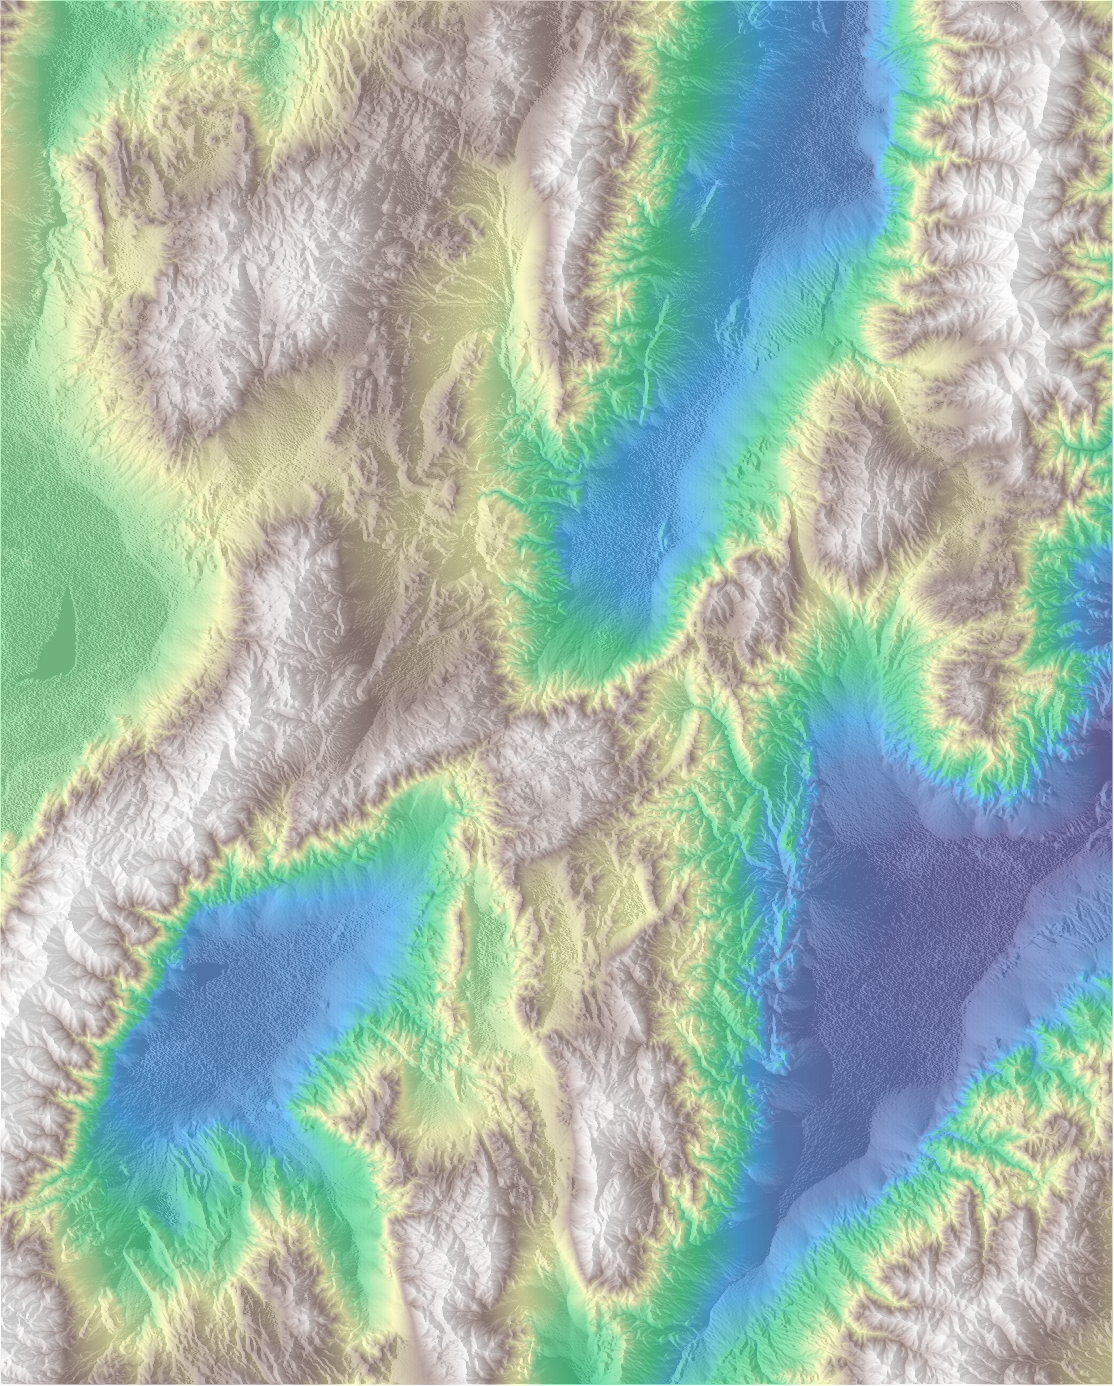

In [3]:
# Render the hillshade with a coloramp of the values applied on top
elevation_shaded = hillshade(elevation, azimuth=100, angle_altitude=50)
stack(
    shade(elevation_shaded, cmap=["white", "gray"]),
    shade(elevation, cmap=plt.get_cmap("terrain"), alpha=128)
)

#### Load temperature data

Temperature data in this example is collected for 4 months of 2021 as specified in the dictionary below. The data is available for both day time and night time.

In [4]:
datetimes = {
    'March': '2021-03-31T00:00:00.000000000',
    'June': '2021-06-30T00:00:00.000000000',
    'September': '2021-09-30T00:00:00.000000000',
    'December': '2021-12-31T00:00:00.000000000'
}

Load day time temperature data.

In [5]:
day_temp_data = xr.open_rasterio('day_temp_data.tif')
day_temp_data

/tmp/ipykernel_568/64376291.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  day_temp_data = xr.open_rasterio('day_temp_data.tif')


<xarray.DataArray (band: 4, y: 1386, x: 1114)>
[6176016 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 4.439e+06 4.439e+06 4.439e+06 ... 4.301e+06 4.301e+06
  * x        (x) float64 -1.314e+07 -1.314e+07 ... -1.302e+07 -1.302e+07
Attributes:
    transform:      (100.0, 0.0, -13135700.0, 0.0, -100.0, 4439200.0)
    crs:            +init=epsg:3857
    res:            (100.0, 100.0)
    is_tiled:       0
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    descriptions:   ('LST_Day_1km', 'LST_Day_1km', 'LST_Day_1km', 'LST_Day_1km')
    AREA_OR_POINT:  Area

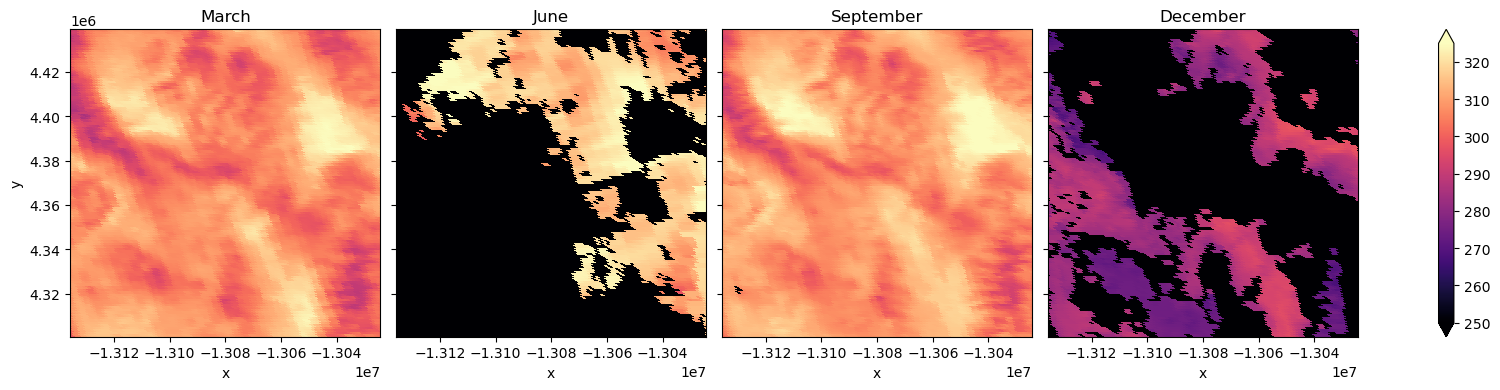

In [6]:
day_temp_plots = day_temp_data.plot.imshow(cmap="magma", col="band", vmin=250, vmax=325, size=4)
for ax, datetime in zip(day_temp_plots.axes.flat, datetimes.keys()):
    ax.set_title(datetime)

Load night time temperature data.

In [7]:
night_temp_data = xr.open_rasterio('night_temp_data.tif')
night_temp_data

/tmp/ipykernel_568/3377186174.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  night_temp_data = xr.open_rasterio('night_temp_data.tif')


<xarray.DataArray (band: 4, y: 1386, x: 1114)>
[6176016 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 4.439e+06 4.439e+06 4.439e+06 ... 4.301e+06 4.301e+06
  * x        (x) float64 -1.314e+07 -1.314e+07 ... -1.302e+07 -1.302e+07
Attributes:
    transform:      (100.0, 0.0, -13135700.0, 0.0, -100.0, 4439200.0)
    crs:            +init=epsg:3857
    res:            (100.0, 100.0)
    is_tiled:       0
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    descriptions:   ('LST_Night_1km', 'LST_Night_1km', 'LST_Night_1km', 'LST_...
    AREA_OR_POINT:  Area

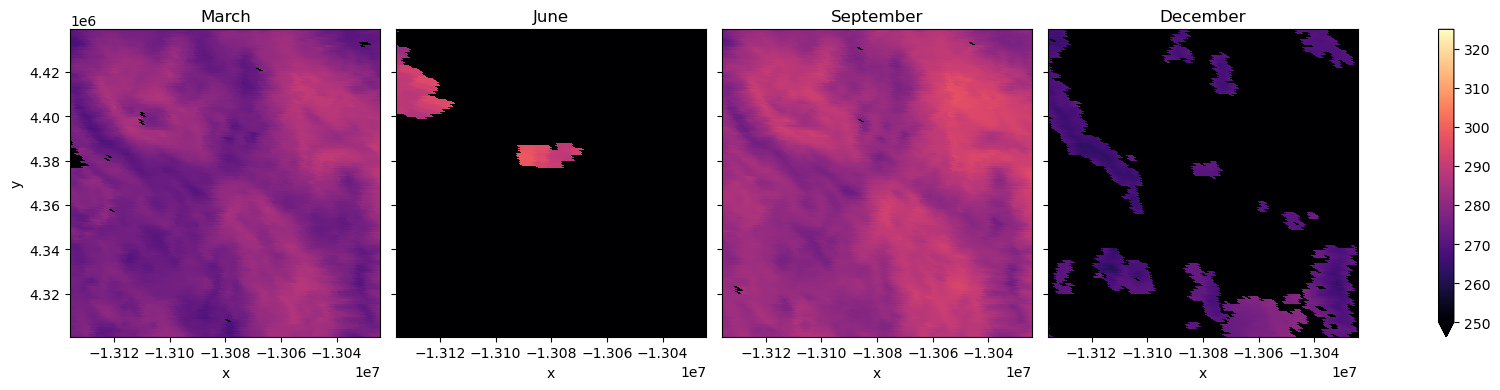

In [8]:
night_temp_plots = night_temp_data.plot.imshow(cmap="magma", col="band", vmin=250, vmax=325, size=4)
for ax, datetime in zip(night_temp_plots.axes.flat, datetimes.keys()):
    ax.set_title(datetime)

## 2D Zonal Crosstab

2D zonal crosstab works on two different 2D datasets, one for `zones`, and the other for `values`.

To define `zones` data, we'll use `xrspatial.classify.quantile` function to group elevation data into different classes. Each class will be a separate zone.

In [9]:
n_elevation_classes = 10
zones = quantile(elevation, k=n_elevation_classes, name='Elevation Zones')

shaded_zones = shade(zones, cmap=plt.get_cmap("terrain"), how="linear")

In order to define the 2D `values` data, let's use day time temperature of March 2021 and categorize them into different classes. Each class contains temperature with similar values. We'll use `xrspatial.classify.quantile` once more to do this.

In [10]:
day_temp_march = day_temp_data[0]

n_temp_classes = 10
classified_day_temp_march = quantile(day_temp_march, k=n_temp_classes, name='Temperature Classes (March)')
shaded_temp_classes_march = shade(classified_day_temp_march, cmap=plt.get_cmap("coolwarm"), how="linear")

Visualize the `zones` and `values` we've defined above.


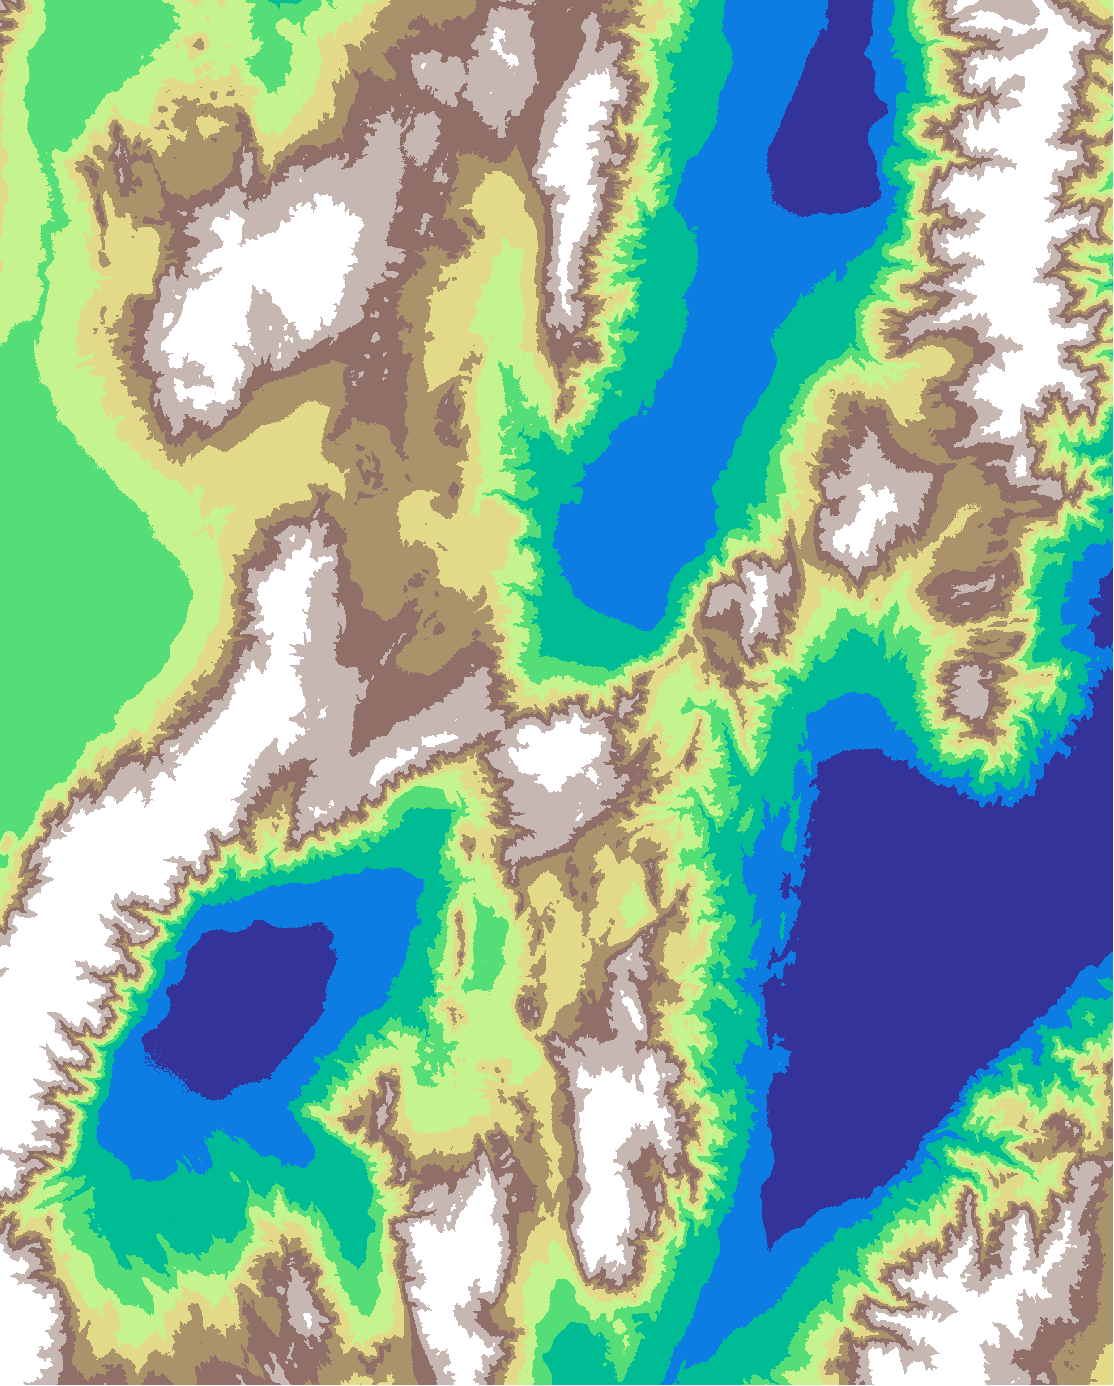
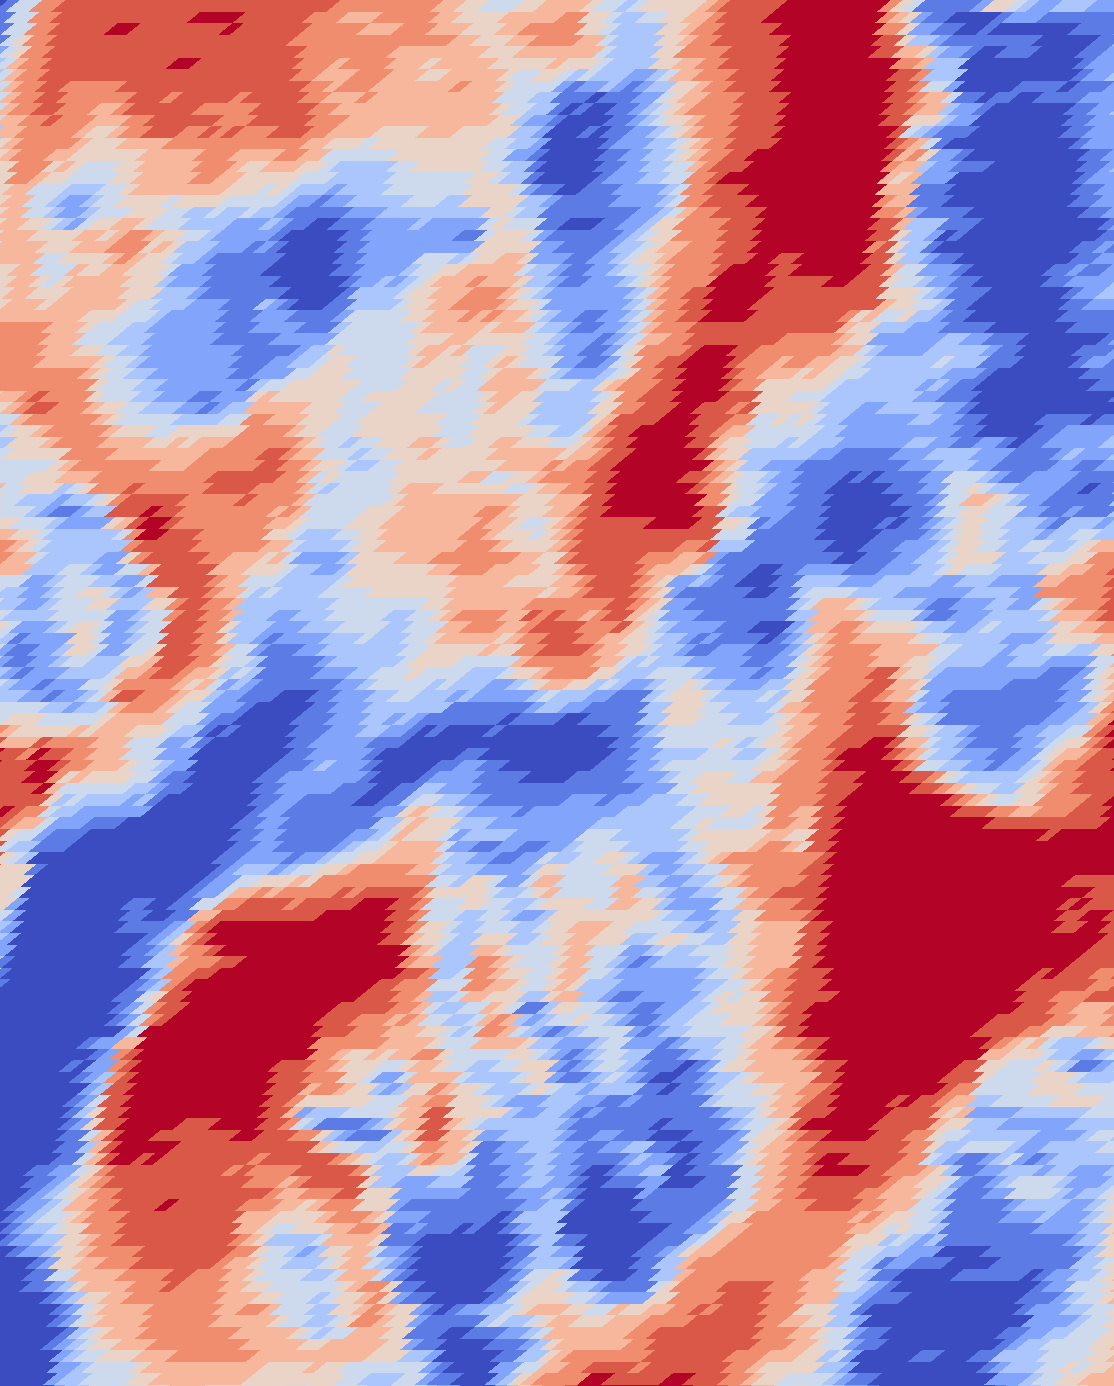

In [11]:
imgs = Images(shaded_zones, shaded_temp_classes_march)
imgs.num_cols = 2
imgs

Let's write a small util function to get range of each class/category in a categorical data array. From that, we can know exactly what range a elevation `zone` covers, and what range a temperature class is.

In [12]:
# util function to calculate range of each class/bin

def bin_ranges(classified_data, original_data, unit):
    bins = np.unique(classified_data.data[~np.isnan(classified_data.data)])
    ranges = []
    for b in bins:
        bin_data = original_data.data[classified_data.data==b]
        ranges.append(f'{np.nanmin(bin_data):.1f}{unit} - {np.nanmax(bin_data):.1f}{unit}')
    return ranges

In [13]:
elevation_ranges = bin_ranges(zones, elevation, 'm')
elevation_ranges

['-79.0m - 366.0m',
 '367.0m - 624.0m',
 '625.0m - 978.0m',
 '979.0m - 1152.0m',
 '1153.0m - 1341.0m',
 '1342.0m - 1501.0m',
 '1502.0m - 1631.0m',
 '1632.0m - 1795.0m',
 '1796.0m - 2039.0m',
 '2040.0m - 3367.0m']

In [14]:
temperature_ranges = bin_ranges(classified_day_temp_march, day_temp_march, 'F')
temperature_ranges

['285.4F - 298.6F',
 '298.6F - 301.9F',
 '301.9F - 303.9F',
 '303.9F - 305.7F',
 '305.7F - 307.3F',
 '307.3F - 308.8F',
 '308.9F - 310.5F',
 '310.5F - 312.5F',
 '312.6F - 316.0F',
 '316.1F - 325.0F']

Now we got all the data we need. Let's run zonal crosstab to see how temperature is changed by elevation for March 2021.

In [15]:
temp_march_by_elevation = zonal_crosstab(zones, classified_day_temp_march, agg='percentage')
temp_march_by_elevation['zone'] = elevation_ranges
temp_march_by_elevation.columns = ['Elevation Zones', *temperature_ranges]
temp_march_by_elevation.set_index('Elevation Zones', inplace=True)
temp_march_by_elevation

285.4F - 298.6F  298.6F - 301.9F  301.9F - 303.9F  \
Elevation Zones                                                        
-79.0m - 366.0m           0.000000         0.000000         0.000000   
367.0m - 624.0m           0.000000         0.024622         0.259829   
625.0m - 978.0m           0.003248         1.397243         3.987762   
979.0m - 1152.0m          0.055236         3.724234        10.175197   
1153.0m - 1341.0m         0.370670         6.649386         9.597900   
1342.0m - 1501.0m         1.337127        10.156472        11.927454   
1502.0m - 1631.0m         2.484808        11.177402        14.118789   
1632.0m - 1795.0m         6.446990        17.744393        19.470089   
1796.0m - 2039.0m        21.432337        29.889044        22.060326   
2040.0m - 3367.0m        68.785635        19.118823         8.514664   

                   303.9F - 305.7F  305.7F - 307.3F  307.3F - 308.8F  \
Elevation Zones                                                        
-79.0m - 366.0m           0.097113         0.304288         1.229452   
367.0m - 624.0m           0.771065         2.887282         4.067854   
625.0m - 978.0m           5.753316        11.581334        16.859808   
979.0m - 1152.0m         14.847548        16.130332        15.331678   
1153.0m - 1341.0m        13.254058        13.109549        15.421054   
1342.0m - 1501.0m        17.702703        12.818440        14.869391   
1502.0m - 1631.0m        15.914494        18.898869        18.104903   
1632.0m - 1795.0m        17.099436        18.056865         9.313466   
1796.0m - 2039.0m        11.556308         6.406143         4.554062   
2040.0m - 3367.0m         2.766924         0.518148         0.256799   

                   308.9F - 310.5F  310.5F - 312.5F  312.6F - 316.0F  \
Elevation Zones                                                        
-79.0m - 366.0m           3.947326         7.089260        18.367334   
367.0m - 624.0m           7.597906        21.674053        35.018661   
625.0m - 978.0m          17.977083        23.895392        17.630858   
979.0m - 1152.0m         11.412493        13.106626        14.276338   
1153.0m - 1341.0m        17.987882        13.136766         9.659463   
1342.0m - 1501.0m        15.428682        11.469675         4.272598   
1502.0m - 1631.0m        11.039321         7.479174         0.782242   
1632.0m - 1795.0m         9.414826         2.425530         0.028407   
1796.0m - 2039.0m         3.939739         0.162041         0.000000   
2040.0m - 3367.0m         0.039007         0.000000         0.000000   

                   316.1F - 325.0F  
Elevation Zones                     
-79.0m - 366.0m          68.965227  
367.0m - 624.0m          27.698727  
625.0m - 978.0m           0.913957  
979.0m - 1152.0m          0.940319  
1153.0m - 1341.0m         0.813272  
1342.0m - 1501.0m         0.017458  
1502.0m - 1631.0m         0.000000  
1632.0m - 1795.0m         0.000000  
1796.0m - 2039.0m         0.000000  
2040.0m - 3367.0m         0.000000

In the result table, each cell represents the percentage of a temperature class that falls within an elevation zone. It can easily be seen that the temperature decreases when the elevation increases and vice versa, the temperature increases when the elevation decreases.

## 3D Zonal Crosstab

3D zonal crosstab works on a 2D `zones` data array with a 3D `values` data array. There are many aggregation methods for calculating the cross tabulated stats between the 2 datasets: `[min, max, mean, sum, std, var, count]`.

In this example, let's see how the average temperature are changed by elevation over time for both day time and night time temperature.

In [16]:
mean_day_temp = zonal_crosstab(zones, day_temp_data, agg='mean')
mean_day_temp['zone'] = elevation_ranges
mean_day_temp.columns = ['Elevation Zones', *datetimes.keys()]
mean_day_temp.set_index('Elevation Zones', inplace=True)

mean_day_temp

March        June   September    December
Elevation Zones                                                  
-79.0m - 366.0m    318.145940   98.714459  320.198669  135.797239
367.0m - 624.0m    313.851039  131.259622  315.795655  144.086133
625.0m - 978.0m    309.630687  147.616794  312.490283   95.796688
979.0m - 1152.0m   308.120314   72.156829  310.768075  149.612589
1153.0m - 1341.0m  307.801086   97.085388  309.987043  108.047330
1342.0m - 1501.0m  306.647138  111.344988  308.883332   78.369354
1502.0m - 1631.0m  305.857409  106.656232  307.558456   60.623574
1632.0m - 1795.0m  304.386440  104.461478  306.081168   70.587494
1796.0m - 2039.0m  301.713501  101.352492  303.904713   78.327348
2040.0m - 3367.0m  296.620759  119.432899  299.645031  160.102433

In [17]:
mean_night_temp = zonal_crosstab(zones, night_temp_data, agg='mean')
mean_night_temp['zone'] = elevation_ranges
mean_night_temp.columns = ['Elevation Zones', *datetimes.keys()]
mean_night_temp.set_index('Elevation Zones', inplace=True)

mean_night_temp

March       June   September    December
Elevation Zones                                                 
-79.0m - 366.0m    284.232968   4.018301  291.131551   20.017402
367.0m - 624.0m    283.127271   9.871382  289.324156   29.979474
625.0m - 978.0m    282.099923   6.957159  288.345014   16.579859
979.0m - 1152.0m   272.921476   5.049224  284.188183    6.807966
1153.0m - 1341.0m  277.034795   7.263711  283.790133   16.365160
1342.0m - 1501.0m  276.652533   9.925948  283.077768   11.786731
1502.0m - 1631.0m  275.986224   9.846942  281.760639   15.778740
1632.0m - 1795.0m  274.696732   8.654294  281.100459   29.338390
1796.0m - 2039.0m  274.257242  18.639939  280.552518   94.530643
2040.0m - 3367.0m  273.530537  23.710618  279.513470  220.195970

Now we can see how much the temperature increases or decreases from day time to night time by elevation over time.

In [18]:
mean_day_temp - mean_night_temp

March        June  September    December
Elevation Zones                                                
-79.0m - 366.0m    33.912972   94.696158  29.067118  115.779837
367.0m - 624.0m    30.723768  121.388239  26.471499  114.106659
625.0m - 978.0m    27.530764  140.659635  24.145268   79.216829
979.0m - 1152.0m   35.198837   67.107605  26.579892  142.804623
1153.0m - 1341.0m  30.766290   89.821678  26.196910   91.682171
1342.0m - 1501.0m  29.994605  101.419040  25.805564   66.582624
1502.0m - 1631.0m  29.871185   96.809290  25.797816   44.844834
1632.0m - 1795.0m  29.689708   95.807184  24.980709   41.249104
1796.0m - 2039.0m  27.456258   82.712553  23.352194  -16.203295
2040.0m - 3367.0m  23.090223   95.722282  20.131560  -60.093538